# Joining Data

In [40]:
import sqlite3
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load temporal bikeshare data from .pkl files

In [17]:
#call all bikeshare dataframes saved as a .pkl files
bikeshare_5pm_df= pd.read_pickle("result_5_05pm_vancouver_bikeshare.pkl")
bikeshare_6pm_df= pd.read_pickle("result_6_12pm_vancouver_bikeshare.pkl")
bikeshare_7pm_df= pd.read_pickle("result_7_18pm_vancouver_bikeshare.pkl")
bikeshare_8pm_df= pd.read_pickle("result_8_05pm_vancouver_bikeshare.pkl")
bikeshare_9pm_df= pd.read_pickle("result_9_05pm_vancouver_bikeshare.pkl")
bikeshare_10pm_df= pd.read_pickle("result_10_10pm_vancouver_bikeshare.pkl")
# bikeshare_11pm_df= pd.read_pickle("result_11pm_vancouver_bikeshare.pkl")
bikeshare_12am_df= pd.read_pickle("result_12_13am_vancouver_bikeshare.pkl")
bikeshare_1am_df= pd.read_pickle("result_1_10am_vancouver_bikeshare.pkl")
bikeshare_2am_df= pd.read_pickle("result_2_05am_vancouver_bikeshare.pkl")
bikeshare_3am_df= pd.read_pickle("result_3_05am_vancouver_bikeshare.pkl")

In [18]:
# # Optional check to ensure the data loaded properly
bikeshare_5pm_df.head(3)

,city,latitude,longitude,name,id,empty_slots,free_bikes,timestamp,ebikes,normal_bikes,slots
0,Vancouver,49.262487,-123.114397,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,27,8,2024-02-09 16:57:42.176000-08:00,4,4,36
1,Vancouver,49.274566,-123.121817,Yaletown-Roundhouse Station,32603a87cfca71d0f7dfa3513bad69d5,3,13,2024-02-09 16:57:42.168000-08:00,0,13,16
2,Vancouver,49.279764,-123.110154,Dunsmuir & Beatty,6d42fa40360f9a6b2bf641c7b8bb2862,17,8,2024-02-09 16:57:42.173000-08:00,0,8,26


**Create new dataframe for percent available bikes** <br>
Combine all timepoints with bikeshare id as the key and a column for percent available bikes at each timepoint calculated as free bikes / total slots

In [19]:
#Create new dataframe
#id column copy assigned from a single timepoint df 
available_bikes_df = bikeshare_5pm_df[['id']].copy()

# columns created for percent available bikes from each timepoint calculated as (calculated as free bikes / total slots)
# columns labelled with timestamp for use in graphical representation and two-way time series ANOVA to follow
available_bikes_df['2024-02-09, 17:00:00'] = bikeshare_5pm_df['free_bikes'] / bikeshare_5pm_df['slots']
available_bikes_df['2024-02-09, 18:00:00'] = bikeshare_6pm_df['free_bikes'] / bikeshare_6pm_df['slots']
available_bikes_df['2024-02-09, 19:00:00'] = bikeshare_7pm_df['free_bikes'] / bikeshare_7pm_df['slots']
available_bikes_df['2024-02-09, 20:00:00'] = bikeshare_8pm_df['free_bikes'] / bikeshare_8pm_df['slots']
available_bikes_df['2024-02-09, 21:00:00'] = bikeshare_9pm_df['free_bikes'] / bikeshare_9pm_df['slots']
available_bikes_df['2024-02-09, 22:00:00'] = bikeshare_10pm_df['free_bikes'] / bikeshare_10pm_df['slots']
available_bikes_df['2024-02-10, 00:00:00'] = bikeshare_12am_df['free_bikes'] / bikeshare_12am_df['slots']
available_bikes_df['2024-02-10, 01:00:00'] = bikeshare_1am_df['free_bikes'] / bikeshare_1am_df['slots']
available_bikes_df['2024-02-10, 02:00:00'] = bikeshare_2am_df['free_bikes'] / bikeshare_2am_df['slots']
available_bikes_df['2024-02-10, 03:00:00'] = bikeshare_3am_df['free_bikes'] / bikeshare_3am_df['slots']


# Check the new dataframe to ensure columns have populated properly and the number of rows remains unchanged
print(available_bikes_df.head())
print(available_bikes_df.shape)

                                 id  2024-02-09, 17:00:00  \
0  7a19c49f486d7c0c02b3685d7b240448              0.222222   
1  32603a87cfca71d0f7dfa3513bad69d5              0.812500   
2  6d42fa40360f9a6b2bf641c7b8bb2862              0.307692   
3  66f873d641d448bd1572ab086665a458              0.062500   
4  485d4d24c803cfde829ab89699fed833              0.312500   

   2024-02-09, 18:00:00  2024-02-09, 19:00:00  2024-02-09, 20:00:00  \
0              0.083333              0.027778              0.055556   
1              0.625000              0.687500              0.625000   
2              0.307692              0.153846              0.153846   
3              0.062500              0.062500              0.062500   
4              0.250000              0.375000              0.312500   

   2024-02-09, 21:00:00  2024-02-09, 22:00:00  2024-02-10, 00:00:00  \
0              0.027778              0.027778              0.027778   
1              0.562500              0.562500              0.500

**Create new dataframe for bar count by bikeshare location id** <br>
Load .pkl file and create new database with only bikeshare location id and the bar count (number of locations per bikeshare).

In [33]:
#call all bikeshare dataframes saved as a .pkl files
temp1_df= pd.read_pickle("bars_within_5min_walk_to_vancouver_bikeshare_locations.pkl")
temp1_df.head(3)

temp2_df= temp1_df.drop(columns=['name', 'distance'])
temp2_df.head(3)

# Grouping by 'bikeshare location id' and counting 'fsq_id'
bars_df = temp2_df.groupby('bikeshare_location_id').size().reset_index(name='bar_count')

# Renaming 'bikeshare location id' to 'id' and moving it to the left
bars_df = bars_df.rename(columns={'bikeshare_location_id': 'id'})[['id', 'bar_count']]

print(bars_df.head())
print(bars_df.shape)

# # Query to select all rows from your_table_name
# query = "SELECT bikeshare_location_id, COUNT(fsq_id) AS bar_count FROM bars_within_5min_walk_to_vancouver_bikeshare_locations GROUP BY bikeshare_location_id;"

# # Execute the query and fetch the results into a DataFrame
# temp1_df = pd.read_sql_query(query, conn)

# #rename columns for easier merge in next step
# bars_df = temp1_df.rename(columns={"bikeshare_location_id": "id"})

                                 id  bar_count
0  012d3e06901cc222b1c2cf0a2ace3a29          1
1  0438114d2e6b96118de69bc9775bb21e          5
2  06487275cd19694152824c7c3088e8ff          2
3  064a7b39b1dbc4bfc4cf8f454e360c57          1
4  066ecc3584913fa035ec1417323beb80          1
(157, 2)


**Merge bikeshare percent available bikes temporal data with bar count using bikeshare location ID**

In [35]:
# 'right' join (merge) dataframes using id column as key
complete_bikeshare_with_bar_count_df = pd.merge(bars_df, available_bikes_df, how= 'right', on='id')

#Optional: check that merge worked as planned and column count is correct (248)
print(complete_bikeshare_with_bar_count_df.head(3))
print(complete_bikeshare_with_bar_count_df.shape)

                                 id  bar_count  2024-02-09, 17:00:00  \
0  7a19c49f486d7c0c02b3685d7b240448        NaN              0.222222   
1  32603a87cfca71d0f7dfa3513bad69d5        9.0              0.812500   
2  6d42fa40360f9a6b2bf641c7b8bb2862        8.0              0.307692   

   2024-02-09, 18:00:00  2024-02-09, 19:00:00  2024-02-09, 20:00:00  \
0              0.083333              0.027778              0.055556   
1              0.625000              0.687500              0.625000   
2              0.307692              0.153846              0.153846   

   2024-02-09, 21:00:00  2024-02-09, 22:00:00  2024-02-10, 00:00:00  \
0              0.027778              0.027778              0.027778   
1              0.562500              0.562500              0.500000   
2              0.230769              0.230769              0.192308   

   2024-02-10, 01:00:00  2024-02-10, 02:00:00  2024-02-10, 03:00:00  
0              0.027778              0.027778              0.027778  
1

**Fill NaN Bar Count Values with zero**

In [36]:
#Fill NaN bar count values with zero
complete_bikeshare_with_bar_count_df['bar_count'] = complete_bikeshare_with_bar_count_df['bar_count'].fillna(0)

#Save dataframe to pickle file
complete_bikeshare_with_bar_count_df.to_pickle("complete_bikeshare_with_bar_count_df.pkl")

# Display the modified dataframe and info
print(complete_bikeshare_with_bar_count_df.head(3))
print(complete_bikeshare_with_bar_count_df.shape)
print(complete_bikeshare_with_bar_count_df.columns)

                                 id  bar_count  2024-02-09, 17:00:00  \
0  7a19c49f486d7c0c02b3685d7b240448        0.0              0.222222   
1  32603a87cfca71d0f7dfa3513bad69d5        9.0              0.812500   
2  6d42fa40360f9a6b2bf641c7b8bb2862        8.0              0.307692   

   2024-02-09, 18:00:00  2024-02-09, 19:00:00  2024-02-09, 20:00:00  \
0              0.083333              0.027778              0.055556   
1              0.625000              0.687500              0.625000   
2              0.307692              0.153846              0.153846   

   2024-02-09, 21:00:00  2024-02-09, 22:00:00  2024-02-10, 00:00:00  \
0              0.027778              0.027778              0.027778   
1              0.562500              0.562500              0.500000   
2              0.230769              0.230769              0.192308   

   2024-02-10, 01:00:00  2024-02-10, 02:00:00  2024-02-10, 03:00:00  
0              0.027778              0.027778              0.027778  
1

**Group Data by Bar Count to Pull out Relationships**

In [37]:
# Create new df of data grouped by bar count with the mean of the datapoints being taken for each timepoint
grouped_bar_count = complete_bikeshare_with_bar_count_df.drop(columns = ['id']).groupby('bar_count')
available_bikes_by_bar_count_over_time = grouped_bar_count.mean()

#print new df
print(available_bikes_by_bar_count_over_time)

           2024-02-09, 17:00:00  2024-02-09, 18:00:00  2024-02-09, 19:00:00  \
bar_count                                                                     
0.0                    0.406699              0.406037              0.416925   
1.0                    0.390821              0.396661              0.392857   
2.0                    0.454553              0.450198              0.471657   
3.0                    0.449680              0.431864              0.416710   
4.0                    0.461388              0.459887              0.494620   
5.0                    0.511636              0.536479              0.553192   
6.0                    0.328502              0.348485              0.368159   
7.0                    0.750000              0.916667              0.750000   
8.0                    0.368169              0.465013              0.455162   
9.0                    0.463141              0.387821              0.408654   
10.0                   0.513523              0.50134

**visualization used as part of your EDA process** <br>
Doesn't appear to be a strong relationship

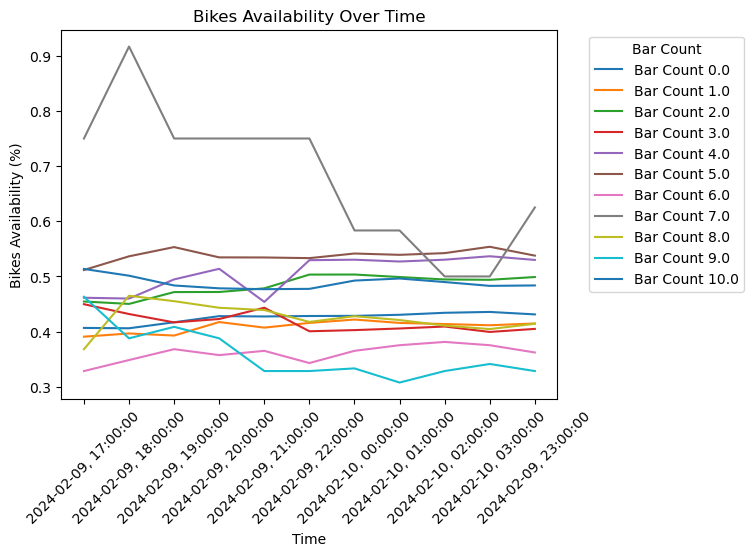

In [54]:
import matplotlib.pyplot as plt

# plot lines for each bar count 
for bar_count, row in available_bikes_by_bar_count_over_time.iterrows():
    plt.plot(range(len(available_bikes_by_bar_count_over_time.columns)), row, label=f'Bar Count {bar_count}')

# Set x-axis ticks to match your time points
plt.xticks(range(len(available_bikes_by_bar_count_over_time.columns)), available_bikes_by_bar_count_over_time.columns, rotation=45)

# Set plot properties
plt.title('Bikes Availability Over Time')
plt.xlabel('Time')
plt.ylabel('Bikes Availability (%)')

# Move the legend outside of the plot
plt.legend(title='Bar Count', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image (adjust the filename and format as needed)
plt.savefig('bikes_availability_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.

In [5]:
import sqlite3
import pandas as pd

**Creating Bikeshare Data Tables** <br>
Create project database and add the following tables to project database: <br>

Table (1) for bikeshare location information including the following columns: <br>
(bikeshare)"id" as primary key, "name", "city", "latitude", "longitude", "slots"

Table (2) for time dependant bikeshare location variables at all timepoints including the following columns:<br>
(bikeshare)"id" as foreign key, "empty_slots", "free_bikes", "timestamp", "ebikes", "normal_bikes"

In [7]:
# #call all bikeshare dataframes saved as a .pkl files
bikeshare_5pm_df= pd.read_pickle("result_5_05pm_vancouver_bikeshare.pkl")
bikeshare_6pm_df= pd.read_pickle("result_6_12pm_vancouver_bikeshare.pkl")
bikeshare_7pm_df= pd.read_pickle("result_7_18pm_vancouver_bikeshare.pkl")
bikeshare_8pm_df= pd.read_pickle("result_8_05pm_vancouver_bikeshare.pkl")
bikeshare_9pm_df= pd.read_pickle("result_9_05pm_vancouver_bikeshare.pkl")
bikeshare_10pm_df= pd.read_pickle("result_10_10pm_vancouver_bikeshare.pkl")
# bikeshare_11pm_df= pd.read_pickle("result_11pm_vancouver_bikeshare.pkl")
bikeshare_12am_df= pd.read_pickle("result_12_13am_vancouver_bikeshare.pkl")
bikeshare_1am_df= pd.read_pickle("result_1_10am_vancouver_bikeshare.pkl")
bikeshare_2am_df= pd.read_pickle("result_2_05am_vancouver_bikeshare.pkl")
bikeshare_3am_df= pd.read_pickle("result_3_05am_vancouver_bikeshare.pkl")

In [69]:
# create list of dataframe names to be used in for loop required for SQLite Table (2) creation 
dataframe_list = [bikeshare_5pm_df, bikeshare_6pm_df, bikeshare_7pm_df, bikeshare_8pm_df, bikeshare_9pm_df, bikeshare_10pm_df, bikeshare_12am_df, bikeshare_1am_df, bikeshare_2am_df, bikeshare_3am_df]

In [ ]:
# # Optional shape check to ensure number of rows is always the same
# print(bikeshare_5pm_df.shape)
# print(bikeshare_6pm_df.shape)
# print(bikeshare_7pm_df.shape)
# print(bikeshare_8pm_df.shape)
# print(bikeshare_9pm_df.shape)
# print(bikeshare_10pm_df.shape)
# # print(bikeshare_11pm_df.shape)
# print(bikeshare_12am_df.shape)
# print(bikeshare_1am_df.shape)
# print(bikeshare_2am_df.shape)
# print(bikeshare_3am_df.shape)

**Table (1): 'vancouver_bikeshare_locations'** <br>
(bikeshare)"id" as primary key, "bikeshare_name", "city", "latitude", "longitude", "slots"

In [64]:
# create temporary df using one of the bikeshare dataframes with only the columns required for database table, drop all other columns
temp_df = bikeshare_5pm_df.drop(columns =["empty_slots", "free_bikes", "timestamp", "ebikes", "normal_bikes"])

# Connect to SQLite database (or create a new one if .db doesn't exist)
conn = sqlite3.connect('statistical_modelling_project.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define the SQLite table schema
table_1_schema = '''
    CREATE TABLE IF NOT EXISTS vancouver_bikeshare_locations (
        id TEXT PRIMARY KEY,
        name TEXT,
        city TEXT,
        latitude TEXT,
        longitude TEXT,
        slots INTEGER
    );
'''

# Execute the table creation SQL command
cursor.execute(table_1_schema)

# Commit the changes to the database
conn.commit()

# Use the to_sql method to write the DataFrame to the SQLite table
temp_df.to_sql('vancouver_bikeshare_locations', conn, index=False, if_exists='append')  
# Change 'replace' to 'append' if needed - done :)

# Close the database connection
conn.close()

In [65]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM vancouver_bikeshare_locations;"

# Execute the query and fetch the results into a DataFrame
bikeshare_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bikeshare_df.head(3))
print(bikeshare_df.shape)

# Close the database connection
conn.close()

                                 id                         name       city  \
0  7a19c49f486d7c0c02b3685d7b240448                10th & Cambie  Vancouver   
1  32603a87cfca71d0f7dfa3513bad69d5  Yaletown-Roundhouse Station  Vancouver   
2  6d42fa40360f9a6b2bf641c7b8bb2862            Dunsmuir & Beatty  Vancouver   

    latitude    longitude  slots  
0  49.262487  -123.114397     36  
1  49.274566  -123.121817     16  
2  49.279764  -123.110154     26  
(248, 6)


In [66]:
# #Optional: code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE vancouver_bikeshare_locations;")
# conn.commit()
# conn.close()

**Table (2): 'bikeshare_location_temporal_data'** <br>
(bikeshare)"id" as foreign key, "empty_slots", "free_bikes", "timestamp", "ebikes", "normal_bikes"

In [74]:
# loop through dataframe list to append each dataframe to the bikeshare_location_temporal_data
for df in dataframe_list:
    
    # create temporary df with only the columns required for database table, drop all othercolumns
    temp_df = bikeshare_5pm_df.drop(columns = ["name", "city", "latitude", "longitude", "slots"])

    # Connect to SQLite database
    conn = sqlite3.connect('statistical_modelling_project.db')

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Define the SQLite table schema
    table_1_schema = '''
        CREATE TABLE IF NOT EXISTS bikeshare_location_temporal_data (
            id TEXT,
            empty_slots INTEGER,
            free_bikes INTEGER,
            timestamp TIMESTAMP,
            ebikes INTEGER,
            normal_bikes INTEGER,
            FOREIGN KEY (id) REFERENCES vancouver_bikeshare_locations (id)
        );
    '''

    # Execute the table creation SQL command
    cursor.execute(table_1_schema)

    # Commit the changes to the database
    conn.commit()

    # Use the to_sql method to write the DataFrame to the SQLite table
    temp_df.to_sql('bikeshare_location_temporal_data', conn, index=False, if_exists='append')  
    # Change 'replace' to 'append' if needed - done :)

    # Close the database connection
    conn.close()

In [83]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM bikeshare_location_temporal_data;"

# Execute the query and fetch the results into a DataFrame
bikeshare_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bikeshare_df.head(3))
print(bikeshare_df.shape)

# Close the database connection
conn.close()

                                 id  empty_slots  free_bikes  \
0  7a19c49f486d7c0c02b3685d7b240448           27           8   
1  32603a87cfca71d0f7dfa3513bad69d5            3          13   
2  6d42fa40360f9a6b2bf641c7b8bb2862           17           8   

                          timestamp  ebikes  normal_bikes  
0  2024-02-09 16:57:42.176000-08:00       4             4  
1  2024-02-09 16:57:42.168000-08:00       0            13  
2  2024-02-09 16:57:42.173000-08:00       0             8  
(2480, 6)


In [72]:
# #Optional: code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE bikeshare_location_temporal_data;")
# conn.commit()
# conn.close()

**Creating Foursquare Data Table** <br>
Add the Table (3) to project database for Foursquare bars within 5 minute walk to bikesahre locations including the following columns: <br>

**Table (3): 'bars_within_5min_walk_to_vancouver_bikeshare_locations'** <br>
"fsq_id", "name", "distance", "bikeshare_location_id" as foreign key

In [8]:
# #call bars_within_5min_walk_to_vancouver_bikeshare_locations dataframe saved as a .pkl file
bars_df= pd.read_pickle("bars_within_5min_walk_to_vancouver_bikeshare_locations.pkl")
# # bars_df.shape
# # bars_df.head()

In [9]:
# Connect to SQLite database
conn = sqlite3.connect('statistical_modelling_project.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define the SQLite table schema
table_schema = '''
    CREATE TABLE IF NOT EXISTS bars_within_5_min_walk_to_vancouver_bikeshare_locations (
        fsq_id TEXT,
        name TEXT,
        distance TEXT,
        bikeshare_location_id TEXT,
        FOREIGN KEY (bikeshare_location_id) REFERENCES vancouver_bikeshare_locations (id)
    );
'''

# Execute the table creation SQL command
cursor.execute(table_schema)

# Commit the changes to the database
conn.commit()

# Use the to_sql method to write the DataFrame to the SQLite table
bars_df.to_sql('bars_within_5_min_walk_to_vancouver_bikeshare_locations', conn, index=False, if_exists='append')  
# Change 'replace' to 'append' if needed - done :)

# Close the database connection
conn.close()

In [82]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM bars_within_5_min_walk_to_vancouver_bikeshare_locations;"

# Execute the query and fetch the results into a DataFrame
bars_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bars_df.head(5))
print(bars_df.shape)

# Close the database connection
conn.close()

                     fsq_id                          name distance  \
0  4aa7d1a8f964a520624d20e3    Brix Restaurant & Wine Bar      133   
1  50f79659e4b0c8265c3c52b7            TWB - the Wine Bar      232   
2  4aaa02cbf964a520905520e3           Yaletown Brewing Co      110   
3  517b21d7e4b08338c6c6e247  The Distillery Bar + Kitchen       87   
4  5650184c498e340b58909282                 Hello Goodbye      116   

              bikeshare_location_id  
0  32603a87cfca71d0f7dfa3513bad69d5  
1  32603a87cfca71d0f7dfa3513bad69d5  
2  32603a87cfca71d0f7dfa3513bad69d5  
3  32603a87cfca71d0f7dfa3513bad69d5  
4  32603a87cfca71d0f7dfa3513bad69d5  
(673, 4)


In [10]:
# #code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE bars_within_5_min_walk_to_vancouver_bikeshare_locations;")
# conn.commit()
# conn.close()

**Table (1): 'vancouver_bikeshare_locations'** <br>
(bikeshare)"id" as primary key, "bikeshare_name", "city", "latitude", "longitude", "slots"

In [64]:
# create temporary df using one of the bikeshare dataframes with only the columns required for database table, drop all other columns
temp_df = bikeshare_5pm_df.drop(columns =["empty_slots", "free_bikes", "timestamp", "ebikes", "normal_bikes"])

# Connect to SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('statistical_modelling_project_db.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define the SQLite table schema
table_1_schema = '''
    CREATE TABLE IF NOT EXISTS vancouver_bikeshare_locations (
        id TEXT PRIMARY KEY,
        name TEXT,
        city TEXT,
        latitude TEXT,
        longitude TEXT,
        slots INTEGER
    );
'''

# Execute the table creation SQL command
cursor.execute(table_1_schema)

# Commit the changes to the database
conn.commit()

# Use the to_sql method to write the DataFrame to the SQLite table
temp_df.to_sql('vancouver_bikeshare_locations', conn, index=False, if_exists='append')  
# Change 'replace' to 'append' if needed - done :)

# Close the database connection
conn.close()

In [65]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project_db.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM vancouver_bikeshare_locations;"

# Execute the query and fetch the results into a DataFrame
bikeshare_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bikeshare_df.head(3))
print(bikeshare_df.shape)

# Close the database connection
conn.close()

                                 id                         name       city  \
0  7a19c49f486d7c0c02b3685d7b240448                10th & Cambie  Vancouver   
1  32603a87cfca71d0f7dfa3513bad69d5  Yaletown-Roundhouse Station  Vancouver   
2  6d42fa40360f9a6b2bf641c7b8bb2862            Dunsmuir & Beatty  Vancouver   

    latitude    longitude  slots  
0  49.262487  -123.114397     36  
1  49.274566  -123.121817     16  
2  49.279764  -123.110154     26  
(248, 6)


In [66]:
# #Optional: code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project_db.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE vancouver_bikeshare_locations;")
# conn.commit()
# conn.close()

**Table (2): 'bikeshare_location_temporal_data'** <br>
(bikeshare)"id" as foreign key, "empty_slots", "free_bikes", "timestamp", "ebikes", "normal_bikes"

In [74]:
# loop through dataframe list to append each dataframe to the bikeshare_location_temporal_data
for df in dataframe_list:
    
    # create temporary df with only the columns required for database table, drop all othercolumns
    temp_df = bikeshare_5pm_df.drop(columns = ["name", "city", "latitude", "longitude", "slots"])

    # Connect to SQLite database (or create a new one if it doesn't exist)
    conn = sqlite3.connect('statistical_modelling_project_db.db')

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Define the SQLite table schema
    table_1_schema = '''
        CREATE TABLE IF NOT EXISTS bikeshare_location_temporal_data (
            id TEXT,
            empty_slots INTEGER,
            free_bikes INTEGER,
            timestamp TIMESTAMP,
            ebikes INTEGER,
            normal_bikes INTEGER,
            FOREIGN KEY (id) REFERENCES vancouver_bikeshare_locations (id)
        );
    '''

    # Execute the table creation SQL command
    cursor.execute(table_1_schema)

    # Commit the changes to the database
    conn.commit()

    # Use the to_sql method to write the DataFrame to the SQLite table
    temp_df.to_sql('bikeshare_location_temporal_data', conn, index=False, if_exists='append')  
    # Change 'replace' to 'append' if needed - done :)

    # Close the database connection
    conn.close()

In [83]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project_db.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM bikeshare_location_temporal_data;"

# Execute the query and fetch the results into a DataFrame
bikeshare_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bikeshare_df.head(3))
print(bikeshare_df.shape)

# Close the database connection
conn.close()

                                 id  empty_slots  free_bikes  \
0  7a19c49f486d7c0c02b3685d7b240448           27           8   
1  32603a87cfca71d0f7dfa3513bad69d5            3          13   
2  6d42fa40360f9a6b2bf641c7b8bb2862           17           8   

                          timestamp  ebikes  normal_bikes  
0  2024-02-09 16:57:42.176000-08:00       4             4  
1  2024-02-09 16:57:42.168000-08:00       0            13  
2  2024-02-09 16:57:42.173000-08:00       0             8  
(2480, 6)


In [72]:
# #Optional: code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project_db.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE bikeshare_location_temporal_data;")
# conn.commit()
# conn.close()

**Creating Foursquare Data Table** <br>
Add the Table (3) to project database for Foursquare bars within 5 minute walk to bikesahre locations including the following columns: <br>

**Table (3): 'bars_within_5min_walk_to_vancouver_bikeshare_locations'** <br>
"fsq_id", "name", "distance", "bikeshare_location_id" as foreign key

In [76]:
#call bars_within_5min_walk_to_vancouver_bikeshare_locations dataframe saved as a .pkl file
bars_df= pd.read_pickle("bars_within_5min_walk_to_vancouver_bikeshare_locations.pkl")
# bars_df.shape
# bars_df.head()

In [81]:
# Connect to SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('statistical_modelling_project_db.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define the SQLite table schema
table_schema = '''
    CREATE TABLE IF NOT EXISTS bars_within_5_min_walk_to_vancouver_bikeshare_locations (
        fsq_id TEXT,
        name TEXT,
        distance TEXT,
        bikeshare_location_id TEXT,
        FOREIGN KEY (bikeshare_location_id) REFERENCES vancouver_bikeshare_locations (id)
    );
'''

# Execute the table creation SQL command
cursor.execute(table_schema)

# Commit the changes to the database
conn.commit()

# Use the to_sql method to write the DataFrame to the SQLite table
bars_df.to_sql('bars_within_5_min_walk_to_vancouver_bikeshare_locations', conn, index=False, if_exists='append')  
# Change 'replace' to 'append' if needed - done :)

# Close the database connection
conn.close()

In [82]:
# Optional: connect to the created database and query each created table to ensure tables were properly created and populated
# Connect to the SQLite database
conn = sqlite3.connect('statistical_modelling_project_db.db')

# Query to select all rows from your_table_name
query = "SELECT * FROM bars_within_5_min_walk_to_vancouver_bikeshare_locations;"

# Execute the query and fetch the results into a DataFrame
bars_df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(bars_df.head(5))
print(bars_df.shape)

# Close the database connection
conn.close()

                     fsq_id                          name distance  \
0  4aa7d1a8f964a520624d20e3    Brix Restaurant & Wine Bar      133   
1  50f79659e4b0c8265c3c52b7            TWB - the Wine Bar      232   
2  4aaa02cbf964a520905520e3           Yaletown Brewing Co      110   
3  517b21d7e4b08338c6c6e247  The Distillery Bar + Kitchen       87   
4  5650184c498e340b58909282                 Hello Goodbye      116   

              bikeshare_location_id  
0  32603a87cfca71d0f7dfa3513bad69d5  
1  32603a87cfca71d0f7dfa3513bad69d5  
2  32603a87cfca71d0f7dfa3513bad69d5  
3  32603a87cfca71d0f7dfa3513bad69d5  
4  32603a87cfca71d0f7dfa3513bad69d5  
(673, 4)


In [11]:
# #code to drop table if required
# conn = sqlite3.connect('statistical_modelling_project_db.db')
# cursor = conn.cursor()
# cursor.execute("DROP TABLE bars_within_5_min_walk_to_vancouver_bikeshare_locations;")
# conn.commit()
# conn.close()